<a href="https://colab.research.google.com/github/tobnie/gaze_predictor_nn/blob/main/train_nn_subject_specific.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Load Package:


In [ ]:
!git clone -l -s https://github.com/tobnie/gaze_predictor_nn.git cloned_repo

%cd cloned_repo

fatal: destination path 'cloned_repo' already exists and is not an empty directory.
/content/cloned_repo


General Hyperparameters:

In [ ]:
epochs = 100

# FC NN - Full State Input Flat

Configuration for NN:

In [ ]:
from tensorflow import keras

nn_configuration = {
    'epochs': epochs,  # number of epochs
    'batch_size': 32,  # size of the batch
    'verbose': 1,  # set the training phase as verbose
    'optimizer': keras.optimizers.Adam(clipvalue=1.0),  # optimizer
    'metrics': ["root_mean_squared_error"],
    'loss': 'mean_squared_error',  # loss
    'val_split': 0.2,  # validation split: percentage of the training data used for evaluating the loss function
    'n_input': 300,
    'input_shape': (300,),
    'n_output': 1  # number of outputs = mfd
}

Create Model:

In [ ]:
from gaze_predictor.fully_connected import FCNetwork

fc_nn = FCNetwork(name='fc_nn', configuration = nn_configuration, subject_specific=True)
fc_nn.create_model()

X shape: (73530, 300)
Created model for fc_nn:
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Input (Dense)               (None, 300)               90300     
                                                                 
 Hidden1 (Dense)             (None, 512)               154112    
                                                                 
 Hidden2 (Dense)             (None, 32)                16416     
                                                                 
 Output (Dense)              (None, 1)                 33        
                                                                 
Total params: 260,861
Trainable params: 260,861
Non-trainable params: 0
_________________________________________________________________
None


Train Model:

In [ ]:
fc_nn.train()

Epoch 1/100
1471/1471 [==============================] - 10s 5ms/step - loss: 4.1516 - root_mean_squared_error: 2.0376 - val_loss: 3.8213 - val_root_mean_squared_error: 1.9548
Epoch 2/100
1471/1471 [==============================] - 6s 4ms/step - loss: 3.3271 - root_mean_squared_error: 1.8240 - val_loss: 3.3293 - val_root_mean_squared_error: 1.8246
Epoch 3/100
1471/1471 [==============================] - 6s 4ms/step - loss: 2.7248 - root_mean_squared_error: 1.6507 - val_loss: 3.1684 - val_root_mean_squared_error: 1.7800
Epoch 4/100
1471/1471 [==============================] - 6s 4ms/step - loss: 2.3252 - root_mean_squared_error: 1.5249 - val_loss: 2.7109 - val_root_mean_squared_error: 1.6465
Epoch 5/100
1471/1471 [==============================] - 6s 4ms/step - loss: 2.0324 - root_mean_squared_error: 1.4256 - val_loss: 2.4256 - val_root_mean_squared_error: 1.5574
Epoch 6/100
1471/1471 [==============================] - 6s 4ms/step - loss: 1.7407 - root_mean_squared_error: 1.3193 - val_

Evaluate Model:

460/460 [==============================] - 1s 3ms/step - loss: 1.1279 - root_mean_squared_error: 1.0620

Test root_mean_squared_error: 1.062044620513916

Test loss: 1.1279388666152954


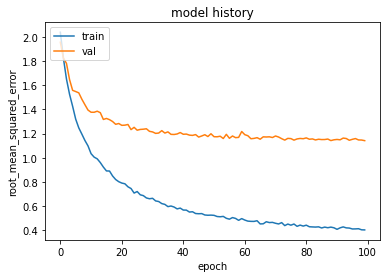

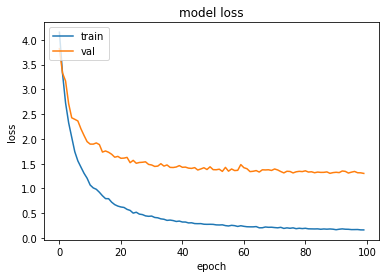

(1.062044620513916, 1.1279388666152954)

In [ ]:
fc_nn.evaluate()

# FC NN - Player Position Input

Configuration for NN:

In [ ]:
from tensorflow import keras

nn_configuration = {
    'epochs': epochs,  # number of epochs
    'batch_size': 32,  # size of the batch
    'verbose': 1,  # set the training phase as verbose
    'optimizer': keras.optimizers.Adam(clipvalue=1.0),  # optimizer
    'metrics': ["root_mean_squared_error"],
    'loss': 'mean_squared_error',  # loss
    'val_split': 0.2,  # validation split: percentage of the training data used for evaluating the loss function
    'n_input': 2,
    'input_shape': (2,),
    'n_output': 1  # number of outputs = mfd
}

Create Model:

In [ ]:
from gaze_predictor.fully_connected import FCNetworkPlayerPosInput

fc_nn_player_pos = FCNetworkPlayerPosInput(name='fc_nn_player_pos', configuration = nn_configuration, subject_specific=True)
fc_nn_player_pos.create_model()

X shape: (73530, 2)
Created model for fc_nn_player_pos:
Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Input (Dense)               (None, 2)                 6         
                                                                 
 Hidden1 (Dense)             (None, 512)               1536      
                                                                 
 Hidden2 (Dense)             (None, 32)                16416     
                                                                 
 Output (Dense)              (None, 1)                 33        
                                                                 
Total params: 17,991
Trainable params: 17,991
Non-trainable params: 0
_________________________________________________________________
None


Train Model:

In [ ]:
fc_nn_player_pos.train()

Epoch 1/100
1471/1471 [==============================] - 7s 4ms/step - loss: 4.3271 - root_mean_squared_error: 2.0802 - val_loss: 4.2627 - val_root_mean_squared_error: 2.0646
Epoch 2/100
1471/1471 [==============================] - 6s 4ms/step - loss: 4.1966 - root_mean_squared_error: 2.0486 - val_loss: 4.2958 - val_root_mean_squared_error: 2.0726
Epoch 3/100
1471/1471 [==============================] - 6s 4ms/step - loss: 4.1632 - root_mean_squared_error: 2.0404 - val_loss: 4.1899 - val_root_mean_squared_error: 2.0469
Epoch 4/100
1471/1471 [==============================] - 6s 4ms/step - loss: 4.1319 - root_mean_squared_error: 2.0327 - val_loss: 4.2259 - val_root_mean_squared_error: 2.0557
Epoch 5/100
1471/1471 [==============================] - 6s 4ms/step - loss: 4.1171 - root_mean_squared_error: 2.0291 - val_loss: 4.1642 - val_root_mean_squared_error: 2.0406
Epoch 6/100
1471/1471 [==============================] - 6s 4ms/step - loss: 4.0999 - root_mean_squared_error: 2.0248 - val_l

Evaluate Model:

460/460 [==============================] - 1s 3ms/step - loss: 4.0870 - root_mean_squared_error: 2.0216

Test root_mean_squared_error: 2.0216376781463623

Test loss: 4.087019443511963


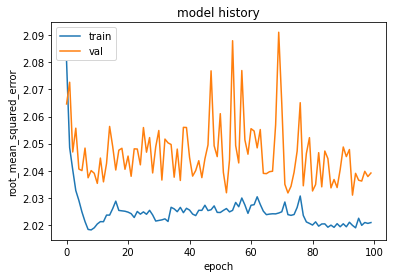

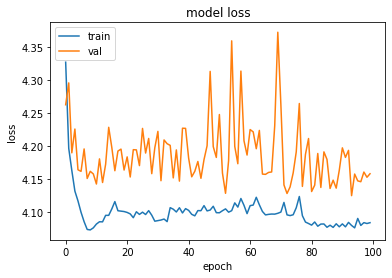

(2.0216376781463623, 4.087019443511963)

In [ ]:
fc_nn_player_pos.evaluate()

# FC NN - Situation (+ Player Pos) Input

7x7 Situation Input:

X shape: (73530, 51)
Created model for fc_nn_situation:
Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Input (Dense)               (None, 51)                2652      
                                                                 
 Hidden1 (Dense)             (None, 512)               26624     
                                                                 
 Hidden2 (Dense)             (None, 32)                16416     
                                                                 
 Output (Dense)              (None, 1)                 33        
                                                                 
Total params: 45,725
Trainable params: 45,725
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/100
1471/1471 [==============================] - 7s 4ms/step - loss: 4.0264 - root_mean_squared_error: 2.0066 - v

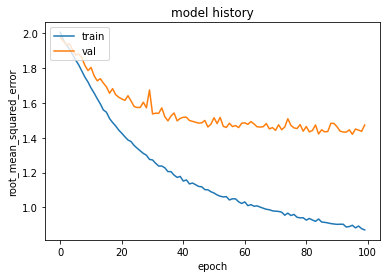

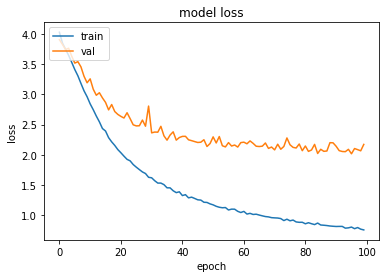

(1.3768510818481445, 1.8957189321517944)

In [ ]:
from gaze_predictor.fully_connected import FCNetworkSituationInput

from tensorflow import keras

nn_configuration = {
    'epochs': epochs,  # number of epochs
    'batch_size': 32,  # size of the batch
    'verbose': 1,  # set the training phase as verbose
    'optimizer': keras.optimizers.Adam(clipvalue=1.0),  # optimizer
    'metrics': ["root_mean_squared_error"],
    'loss': 'mean_squared_error',  # loss
    'val_split': 0.2,  # validation split: percentage of the training data used for evaluating the loss function
    'n_input': 51,
    'input_shape': (51,),
    'n_output': 1  # number of outputs = mfd
}

fc_nn_situation = FCNetworkSituationInput(name='fc_nn_situation', configuration = nn_configuration, subject_specific=True)
fc_nn_situation.create_model()
fc_nn_situation.train()
fc_nn_situation.evaluate()

5x5 Situation Input:

X shape: (73530, 27)
Created model for fc_nn_situation:
Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Input (Dense)               (None, 27)                756       
                                                                 
 Hidden1 (Dense)             (None, 512)               14336     
                                                                 
 Hidden2 (Dense)             (None, 32)                16416     
                                                                 
 Output (Dense)              (None, 1)                 33        
                                                                 
Total params: 31,541
Trainable params: 31,541
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/100
1471/1471 [==============================] - 7s 5ms/step - loss: 4.0903 - root_mean_squared_error: 2.0224 - v

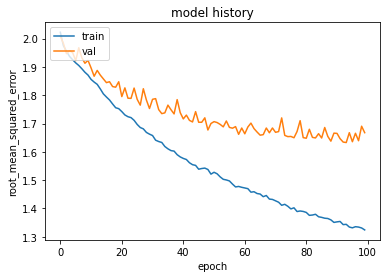

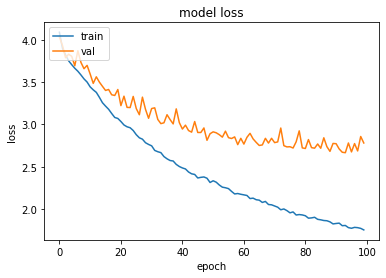

(1.6219933032989502, 2.630862236022949)

In [ ]:
from gaze_predictor.fully_connected import FCNetworkSituationInput

from tensorflow import keras

nn_configuration = {
    'epochs': epochs,  # number of epochs
    'batch_size': 32,  # size of the batch
    'verbose': 1,  # set the training phase as verbose
    'optimizer': keras.optimizers.Adam(clipvalue=1.0),  # optimizer
    'metrics': ["root_mean_squared_error"],
    'loss': 'mean_squared_error',  # loss
    'val_split': 0.2,  # validation split: percentage of the training data used for evaluating the loss function
    'n_input': 27,
    'input_shape': (27,),
    'n_output': 1  # number of outputs = mfd
}

fc_nn_situation = FCNetworkSituationInput(name='fc_nn_situation', configuration = nn_configuration, situation_size=5, subject_specific=True)
fc_nn_situation.create_model()
fc_nn_situation.train()
fc_nn_situation.evaluate()

3x3 Situation Input:

X shape: (73530, 11)
Created model for fc_nn_situation:
Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Input (Dense)               (None, 11)                132       
                                                                 
 Hidden1 (Dense)             (None, 512)               6144      
                                                                 
 Hidden2 (Dense)             (None, 32)                16416     
                                                                 
 Output (Dense)              (None, 1)                 33        
                                                                 
Total params: 22,725
Trainable params: 22,725
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/100
1471/1471 [==============================] - 7s 4ms/step - loss: 4.2591 - root_mean_squared_error: 2.0638 - v

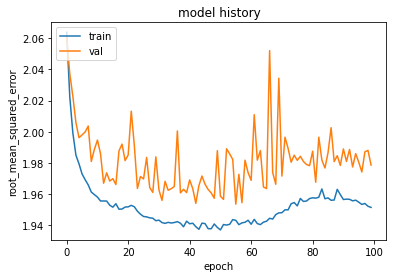

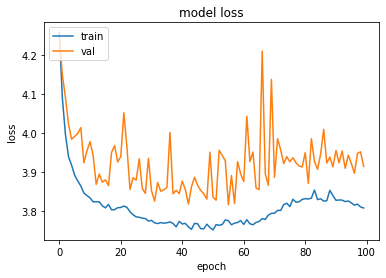

(1.973218321800232, 3.8935906887054443)

In [ ]:
from gaze_predictor.fully_connected import FCNetworkSituationInput

from tensorflow import keras

nn_configuration = {
    'epochs': epochs,  # number of epochs
    'batch_size': 32,  # size of the batch
    'verbose': 1,  # set the training phase as verbose
    'optimizer': keras.optimizers.Adam(clipvalue=1.0),  # optimizer
    'metrics': ["root_mean_squared_error"],
    'loss': 'mean_squared_error',  # loss
    'val_split': 0.2,  # validation split: percentage of the training data used for evaluating the loss function
    'n_input': 11,
    'input_shape': (11,),
    'n_output': 1  # number of outputs = mfd
}

fc_nn_situation = FCNetworkSituationInput(name='fc_nn_situation', configuration = nn_configuration, situation_size=3, subject_specific=True)
fc_nn_situation.create_model()
fc_nn_situation.train()
fc_nn_situation.evaluate()

# ConvNet

Configuration for NN:

In [ ]:
from tensorflow import keras

nn_configuration = {
    'epochs': epochs,  # number of epochs
    'batch_size': 32,  # size of the batch
    'verbose': 1,  # set the training phase as verbose
    'optimizer': keras.optimizers.Adam(clipvalue=1.0),  # optimizer
    'metrics': ["root_mean_squared_error"],
    'loss': 'mean_squared_error',  # loss
    'val_split': 0.2,  # validation split: percentage of the training data used for evaluating the loss function
    'input_shape': (15, 20, 1),
    'n_output': 1  # number of outputs = x and y
}

Create Model:

In [ ]:
from gaze_predictor.convolutional import ConvNetwork

conv_nn = ConvNetwork(name='conv_nn', configuration = nn_configuration, subject_specific=True)
conv_nn.create_model()

Created model for conv_nn:
Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Conv1 (Conv2D)              (None, 15, 20, 16)        416       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 8, 10, 16)        0         
 )                                                               
                                                                 
 Conv2 (Conv2D)              (None, 8, 10, 32)         4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 4, 5, 32)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 640)               0         
                                                                 
 Dense1 (Dense)            

Train Model:

In [ ]:
conv_nn.train()

Epoch 1/100
1471/1471 [==============================] - 15s 6ms/step - loss: 4.3004 - root_mean_squared_error: 2.0737 - val_loss: 4.3541 - val_root_mean_squared_error: 2.0867
Epoch 2/100
1471/1471 [==============================] - 8s 6ms/step - loss: 3.9333 - root_mean_squared_error: 1.9833 - val_loss: 4.1158 - val_root_mean_squared_error: 2.0287
Epoch 3/100
1471/1471 [==============================] - 8s 6ms/step - loss: 3.5661 - root_mean_squared_error: 1.8884 - val_loss: 3.6901 - val_root_mean_squared_error: 1.9210
Epoch 4/100
1471/1471 [==============================] - 9s 6ms/step - loss: 3.1719 - root_mean_squared_error: 1.7810 - val_loss: 3.5476 - val_root_mean_squared_error: 1.8835
Epoch 5/100
1471/1471 [==============================] - 8s 5ms/step - loss: 2.8672 - root_mean_squared_error: 1.6933 - val_loss: 3.4565 - val_root_mean_squared_error: 1.8592
Epoch 6/100
1471/1471 [==============================] - 8s 6ms/step - loss: 2.6187 - root_mean_squared_error: 1.6182 - val_

Evaluate Model:

460/460 [==============================] - 2s 3ms/step - loss: 2.4419 - root_mean_squared_error: 1.5626

Test root_mean_squared_error: 1.5626482963562012

Test loss: 2.4418697357177734


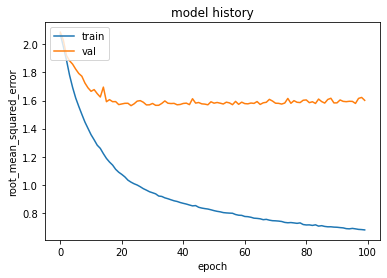

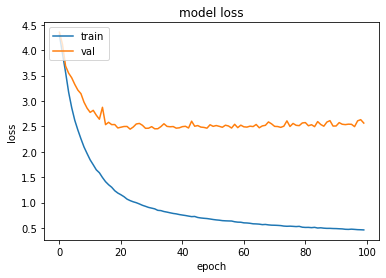

(1.5626482963562012, 2.4418697357177734)

In [ ]:
conv_nn.evaluate()

# ConvNet 3D

Configuration for NN:

In [ ]:
from tensorflow import keras

nn_configuration = {
    'epochs': epochs,  # number of epochs
    'batch_size': 32,  # size of the batch
    'verbose': 1,  # set the training phase as verbose
    'optimizer': keras.optimizers.Adam(clipvalue=1.0),  # optimizer
    'metrics': ["root_mean_squared_error"],
    'loss': 'mean_squared_error',  # loss
    'val_split': 0.2,  # validation split: percentage of the training data used for evaluating the loss function
    'input_shape': (15, 20, 3),
    'n_output': 1  # number of outputs = x and y
}

Create Model:

In [ ]:
from gaze_predictor.convolutional_3d import ConvNetwork3D

conv_nn_3d = ConvNetwork3D(name='conv_nn_3d', configuration = nn_configuration, subject_specific=True)
conv_nn_3d.create_model()

Created model for conv_nn_3d:
Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Conv1_In (Conv2D)           (None, 15, 20, 12)        912       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 8, 10, 12)        0         
 2D)                                                             
                                                                 
 Conv2 (Conv2D)              (None, 8, 10, 32)         3488      
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 4, 5, 32)         0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 640)               0         
                                                                 
 Dense1 (Dense)         

Train Model:

In [ ]:
conv_nn_3d.train()

Epoch 1/100
1471/1471 [==============================] - 9s 6ms/step - loss: 4.2179 - root_mean_squared_error: 2.0538 - val_loss: 4.0173 - val_root_mean_squared_error: 2.0043
Epoch 2/100
1471/1471 [==============================] - 8s 6ms/step - loss: 3.7270 - root_mean_squared_error: 1.9305 - val_loss: 3.7158 - val_root_mean_squared_error: 1.9276
Epoch 3/100
1471/1471 [==============================] - 8s 5ms/step - loss: 3.4702 - root_mean_squared_error: 1.8628 - val_loss: 3.4458 - val_root_mean_squared_error: 1.8563
Epoch 4/100
1471/1471 [==============================] - 8s 5ms/step - loss: 3.1988 - root_mean_squared_error: 1.7885 - val_loss: 3.3948 - val_root_mean_squared_error: 1.8425
Epoch 5/100
1471/1471 [==============================] - 8s 5ms/step - loss: 2.8839 - root_mean_squared_error: 1.6982 - val_loss: 3.0729 - val_root_mean_squared_error: 1.7530
Epoch 6/100
1471/1471 [==============================] - 8s 6ms/step - loss: 2.5905 - root_mean_squared_error: 1.6095 - val_l

Evaluate Model:

460/460 [==============================] - 1s 3ms/step - loss: 1.9492 - root_mean_squared_error: 1.3961

Test root_mean_squared_error: 1.3961466550827026

Test loss: 1.9492254257202148


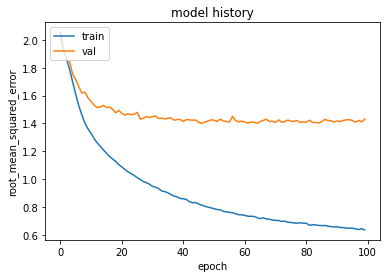

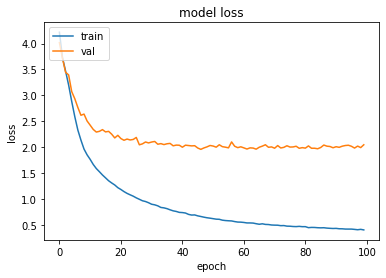

(1.3961466550827026, 1.9492254257202148)

In [ ]:
conv_nn_3d.evaluate()

# ConvNet MultiInput - Situation plus Region

Configuration for NN:

In [ ]:
import tensorflow as tf

nn_configuration = {
    'epochs': epochs,  # number of epochs
    'batch_size': 32,  # size of the batch
    'verbose': 1,  # set the training phase as verbose
    'optimizer': tf.keras.optimizers.Adam(clipvalue=1.0),  # optimizer
    'metrics': ["root_mean_squared_error"],
    'loss': 'mean_squared_error',  # loss
    'val_split': 0.2,  # validation split: percentage of the training data used for evaluating the loss function
    'input_shape': (15, 20, 1),
    'n_output': 1  # number of outputs = x and y
}

Create Model:

In [ ]:
from gaze_predictor.situation_input_architectures.conv_multi_input import MultiInputConvNetwork

multi_input_conv_nn = MultiInputConvNetwork(name='multi_input_conv_nn', configuration = nn_configuration, subject_specific=True)
multi_input_conv_nn.create_model()

X1 shape: (73530, 7, 7, 1)
X2 shape: (73530, 2)
X1 Input Shape:  (7, 7, 1)
X2 Input Shape:  (2,)
First Layer output: KerasTensor(type_spec=TensorSpec(shape=(None, 7, 7, 16), dtype=tf.float32, name=None), name='Conv1/Relu:0', description="created by layer 'Conv1'")
got to end of cnn layer
after concatenation:
 KerasTensor(type_spec=TensorSpec(shape=(None, 130), dtype=tf.float32, name=None), name='concatenate/concat:0', description="created by layer 'concatenate'")
got to end of dense layer
Created model for multi_input_conv_nn:
Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 7, 7, 1)]    0           []                               
                                                                                                  
 Conv1 (Conv2D)                 (None, 7, 7, 16)     416

Train Model:

In [ ]:
multi_input_conv_nn.train()

Epoch 1/100
1471/1471 [==============================] - 9s 5ms/step - loss: 4.0749 - root_mean_squared_error: 2.0186 - val_loss: 4.0235 - val_root_mean_squared_error: 2.0059
Epoch 2/100
1471/1471 [==============================] - 8s 5ms/step - loss: 3.7700 - root_mean_squared_error: 1.9416 - val_loss: 3.7212 - val_root_mean_squared_error: 1.9290
Epoch 3/100
1471/1471 [==============================] - 8s 5ms/step - loss: 3.6075 - root_mean_squared_error: 1.8993 - val_loss: 3.6356 - val_root_mean_squared_error: 1.9067
Epoch 4/100
1471/1471 [==============================] - 8s 6ms/step - loss: 3.4576 - root_mean_squared_error: 1.8595 - val_loss: 3.5461 - val_root_mean_squared_error: 1.8831
Epoch 5/100
1471/1471 [==============================] - 8s 6ms/step - loss: 3.2895 - root_mean_squared_error: 1.8137 - val_loss: 3.4669 - val_root_mean_squared_error: 1.8620
Epoch 6/100
1471/1471 [==============================] - 8s 5ms/step - loss: 3.1567 - root_mean_squared_error: 1.7767 - val_l

Evaluate Model:

460/460 [==============================] - 7s 14ms/step - loss: 2.1044 - root_mean_squared_error: 1.4507

Test root_mean_squared_error: 1.4506665468215942

Test loss: 2.104433536529541


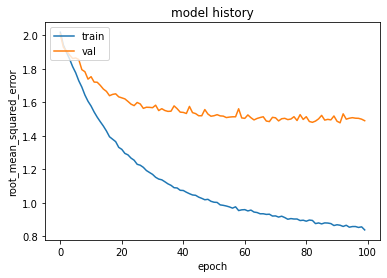

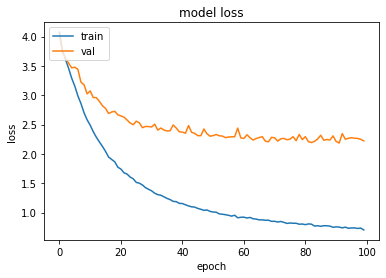

(1.4506665468215942, 2.104433536529541)

In [ ]:
multi_input_conv_nn.evaluate()

# Recurrent Network

Configuration for NN:

In [ ]:
from tensorflow import keras
from gaze_predictor.recurrent_network import RecurrentNetwork

nn_configuration = {
    'epochs': epochs,  # number of epochs
    'batch_size': 32,  # size of the batch
    'verbose': 1,  # set the training phase as verbose
    'optimizer': keras.optimizers.Adam(clipvalue=1.0),  # optimizer
    'metrics': ["root_mean_squared_error"],
    'loss': 'mean_squared_error',  # loss
    'val_split': 0.2,  # validation split: percentage of the training data used for evaluating the loss function
    'n_input': 300,
    'input_shape': (300,),
    'n_output': 1  # number of outputs = mfd
}

In [ ]:
def create_and_run_lstm_model(timesteps, stride):
  lstm_nn = RecurrentNetwork(name='lstm_nn', configuration = nn_configuration, timesteps=timesteps, stride=stride, subject_specific=True)
  lstm_nn.create_model()
  lstm_nn.train()
  lstm_nn.evaluate()

Run for all timestep and stride combinations:

Train Data before: (57945, 1500)
Test Data before: (14486, 1500)
X_train after reshape: (57945, 5, 300)
X_test after reshape: (14486, 5, 300)
Created model for lstm_nn_timesteps=5_stride=5:
Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input (LSTM)                (None, 64)                93440     
                                                                 
 Dense1 (Dense)              (None, 128)               8320      
                                                                 
 Dense2 (Dense)              (None, 16)                2064      
                                                                 
 output (Dense)              (None, 1)                 17        
                                                                 
Total params: 103,841
Trainable params: 103,841
Non-trainable params: 0
________________________________________________________

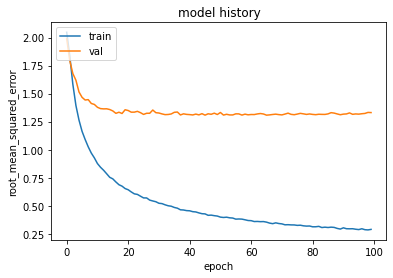

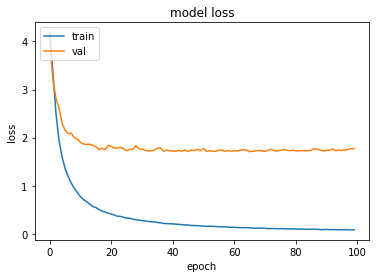

Train Data before: (57172, 1500)
Test Data before: (14292, 1500)
X_train after reshape: (57172, 5, 300)
X_test after reshape: (14292, 5, 300)
Created model for lstm_nn_timesteps=5_stride=10:
Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input (LSTM)                (None, 64)                93440     
                                                                 
 Dense1 (Dense)              (None, 128)               8320      
                                                                 
 Dense2 (Dense)              (None, 16)                2064      
                                                                 
 output (Dense)              (None, 1)                 17        
                                                                 
Total params: 103,841
Trainable params: 103,841
Non-trainable params: 0
_______________________________________________________

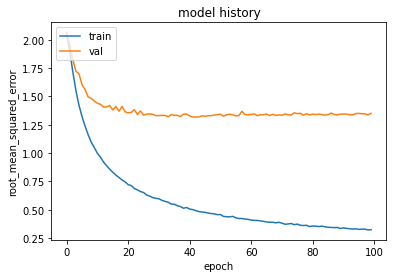

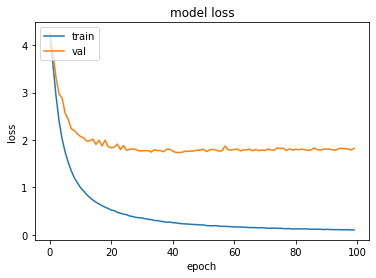

Train Data before: (56073, 1500)
Test Data before: (14018, 1500)
X_train after reshape: (56073, 5, 300)
X_test after reshape: (14018, 5, 300)
Created model for lstm_nn_timesteps=5_stride=20:
Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input (LSTM)                (None, 64)                93440     
                                                                 
 Dense1 (Dense)              (None, 128)               8320      
                                                                 
 Dense2 (Dense)              (None, 16)                2064      
                                                                 
 output (Dense)              (None, 1)                 17        
                                                                 
Total params: 103,841
Trainable params: 103,841
Non-trainable params: 0
_______________________________________________________

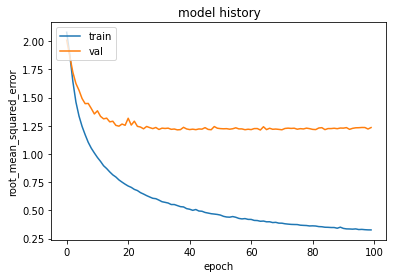

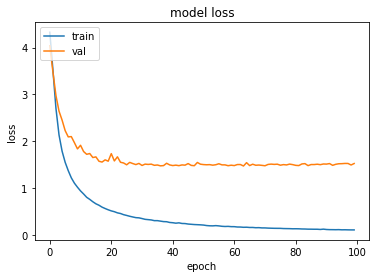

Train Data before: (55677, 6000)
Test Data before: (13919, 6000)
X_train after reshape: (55677, 20, 300)
X_test after reshape: (13919, 20, 300)
Created model for lstm_nn_timesteps=20_stride=5:
Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input (LSTM)                (None, 64)                93440     
                                                                 
 Dense1 (Dense)              (None, 128)               8320      
                                                                 
 Dense2 (Dense)              (None, 16)                2064      
                                                                 
 output (Dense)              (None, 1)                 17        
                                                                 
Total params: 103,841
Trainable params: 103,841
Non-trainable params: 0
____________________________________________________

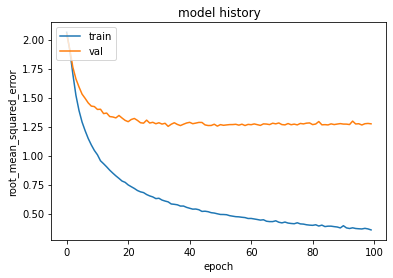

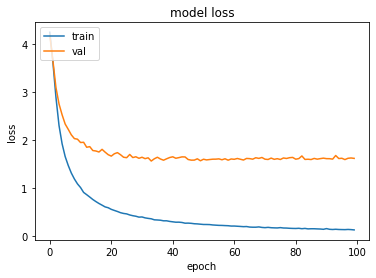

Train Data before: (53164, 6000)
Test Data before: (13290, 6000)
X_train after reshape: (53164, 20, 300)
X_test after reshape: (13290, 20, 300)
Created model for lstm_nn_timesteps=20_stride=10:
Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input (LSTM)                (None, 64)                93440     
                                                                 
 Dense1 (Dense)              (None, 128)               8320      
                                                                 
 Dense2 (Dense)              (None, 16)                2064      
                                                                 
 output (Dense)              (None, 1)                 17        
                                                                 
Total params: 103,841
Trainable params: 103,841
Non-trainable params: 0
___________________________________________________

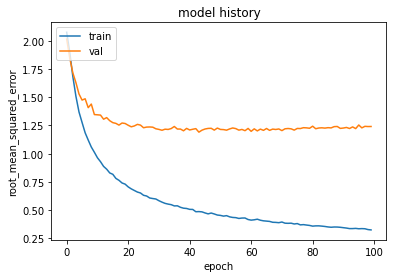

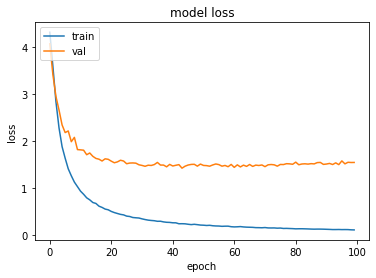

Train Data before: (48301, 6000)
Test Data before: (12075, 6000)
X_train after reshape: (48301, 20, 300)
X_test after reshape: (12075, 20, 300)
Created model for lstm_nn_timesteps=20_stride=20:
Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input (LSTM)                (None, 64)                93440     
                                                                 
 Dense1 (Dense)              (None, 128)               8320      
                                                                 
 Dense2 (Dense)              (None, 16)                2064      
                                                                 
 output (Dense)              (None, 1)                 17        
                                                                 
Total params: 103,841
Trainable params: 103,841
Non-trainable params: 0
___________________________________________________

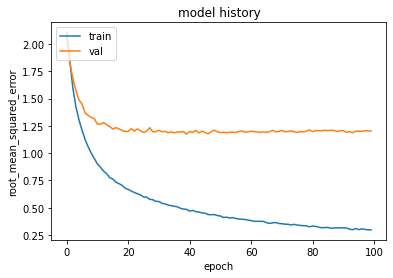

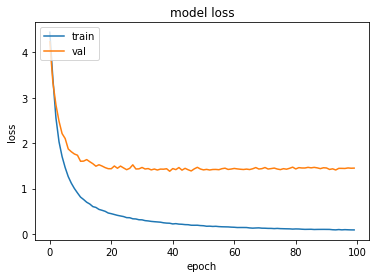

In [ ]:
from itertools import product

timesteps = [100]
strides = [20]

for t, s in product(timesteps, strides):
  create_and_run_lstm_model(t, s)

# Recurrent Convolutional Network - Full State Input (Single Layer FM)

Configuration for NN:

In [ ]:
from tensorflow import keras
from gaze_predictor.recurrent_conv_network import RecurrentConvNetwork

nn_configuration = {
    'epochs': epochs,  # number of epochs
    'batch_size': 32,  # size of the batch
    'verbose': 1,  # set the training phase as verbose
    'optimizer': keras.optimizers.Adam(clipvalue=1.0),  # optimizer
    'metrics': ["root_mean_squared_error"],
    'loss': 'mean_squared_error',  # loss
    'val_split': 0.2,  # validation split: percentage of the training data used for evaluating the loss function
    'n_input': 300,
    'input_shape': (300,),
    'n_output': 1  # number of outputs = mfd
}

ModuleNotFoundError: ignored

In [ ]:
def create_and_run_lstm_model(timesteps, stride):
  lstm_conv_nn = RecurrentConvNetwork(name='lstm_conv_nn', configuration = nn_configuration, timesteps=timesteps, stride=stride, subject_specific=True)
  lstm_conv_nn.create_model()
  lstm_conv_nn.train()
  lstm_conv_nn.evaluate()

Run for all timestep and stride combinations:

In [ ]:
from itertools import product

timesteps = [100]
strides = [20]

for t, s in product(timesteps, strides):
  create_and_run_lstm_model(t, s)

# Recurrent Convolutional Network - Situation Input


Configuration for NN:

In [ ]:
from tensorflow import keras
from gaze_predictor.recurrent_conv_network import RecurrentConvNetworkSituationInput

nn_configuration = {
    'epochs': epochs,  # number of epochs
    'batch_size': 32,  # size of the batch
    'verbose': 1,  # set the training phase as verbose
    'optimizer': keras.optimizers.Adam(clipvalue=1.0),  # optimizer
    'metrics': ["root_mean_squared_error"],
    'loss': 'mean_squared_error',  # loss
    'val_split': 0.2,  # validation split: percentage of the training data used for evaluating the loss function
    'n_input': 300,
    'input_shape': (300,),
    'n_output': 1  # number of outputs = mfd
}

In [ ]:
lstm_conv_nn = RecurrentConvNetworkSituationInput(name='lstm_conv_nn_situation_input', configuration = nn_configuration, subject_specific=True)
lstm_conv_nn.create_model()
lstm_conv_nn.train()
lstm_conv_nn.evaluate()

# FC NN - ELU

Configuration for NN:

In [ ]:
from tensorflow import keras

nn_configuration = {
    'epochs': epochs,  # number of epochs
    'batch_size': 32,  # size of the batch
    'verbose': 1,  # set the training phase as verbose
    'optimizer': keras.optimizers.Adam(clipvalue=1.0),  # optimizer
    'metrics': ["root_mean_squared_error"],
    'loss': 'mean_squared_error',  # loss
    'val_split': 0.2,  # validation split: percentage of the training data used for evaluating the loss function
    'n_input': 300,
    'input_shape': (300,),
    'n_output': 1  # number of outputs = mfd
}

Create Model:

In [ ]:
from gaze_predictor.fully_connected import FCNetworkELU

fc_nn_elu = FCNetworkELU(name='fc_nn_elu', configuration = nn_configuration, subject_specific=True)
fc_nn_elu.create_model()

Train Model:

In [ ]:
fc_nn_elu.train()

Evaluate Model:

In [ ]:
fc_nn_elu.evaluate()

# FC NN - Dropout

Configuration for NN:

In [ ]:
from tensorflow import keras

nn_configuration = {
    'epochs': epochs,  # number of epochs
    'batch_size': 32,  # size of the batch
    'verbose': 1,  # set the training phase as verbose
    'optimizer': keras.optimizers.Adam(clipvalue=1.0),  # optimizer
    'metrics': ["root_mean_squared_error"],
    'loss': 'mean_squared_error',  # loss
    'val_split': 0.2,  # validation split: percentage of the training data used for evaluating the loss function
    'n_input': 300,
    'input_shape': (300,),
    'n_output': 1  # number of outputs = mfd
}

Create Model:

In [ ]:
from gaze_predictor.fully_connected import FCNetworkDropout

fc_nn_dropout = FCNetworkDropout(name='fc_nn_dropout', configuration = nn_configuration, subject_specific=True)
fc_nn_dropout.create_model()

Train Model:

In [ ]:
fc_nn_dropout.train()

Evaluate Model:

In [ ]:
fc_nn_dropout.evaluate()

# FC NN - BatchNormalization

Configuration for NN:

In [ ]:
from tensorflow import keras

nn_configuration = {
    'epochs': epochs,  # number of epochs
    'batch_size': 32,  # size of the batch
    'verbose': 1,  # set the training phase as verbose
    'optimizer': keras.optimizers.Adam(clipvalue=1.0),  # optimizer
    'metrics': ["root_mean_squared_error"],
    'loss': 'mean_squared_error',  # loss
    'val_split': 0.2,  # validation split: percentage of the training data used for evaluating the loss function
    'n_input': 300,
    'input_shape': (300,),
    'n_output': 1  # number of outputs = mfd
}

Create Model:

In [ ]:
from gaze_predictor.fully_connected import FCNetworkBatchNormalization

fc_nn_batch_norm = FCNetworkBatchNormalization(name='fc_nn_batch_norm', configuration = nn_configuration, subject_specific=True)
fc_nn_batch_norm.create_model()

Train Model:

In [ ]:
fc_nn_batch_norm.train()

Evaluate Model:

In [ ]:
fc_nn_batch_norm.evaluate()

In [ ]:
# fc_nn.save_model()
# conv_nn.save_model()
# conv_nn_3d.save_model()
# fc_nn_dropout.save_model()
# fc_nn_batch_norm.save_model()
# fc_nn_elu.save_model()

In [ ]:
# !zip -r /content/file.zip /content
# from google.colab import files
# files.download("/content/file.zip")